# Effects of Loan Characteristics on Borrower's APR
## by Chukwume Ijeh

## Investigation Overview

> Here, I will be focusing on features that could affect the borrower APR, which are Loan Original Amount, Prosper Rating (Alpha), Prosper Score, Term and if borrower is a homeowner or not.

## Dataset Overview

> The dataset consists of 113,937 loan entries with 81 variables on each entry, including Loan Amount, Borrower APR (or interest rate), Current Loan Status, brrower Monthly Income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

# Subset the dataframe by selecting features of interest
cols = ['ListingCreationDate','ProsperScore', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'CurrentDelinquencies']
df_sub = df_loan[cols]

# Convert listing creation date to datetime
df_sub['ListingCreationDate'] = pd.to_datetime(df_sub['ListingCreationDate'])

# Select loan entries that occurred after July, 2009
df_sub = df_sub[df_sub['ListingCreationDate'] >= '2009-08-1']


# data wrangling, remove loans with missing borrower APR information
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

# data wrangling, remove loans with stated monthly income greater than $100k, which are outliers
df_sub = df_sub[df_sub.StatedMonthlyIncome <= 100000]

# Convert 'isborrowerhomeowner' to string
df_sub['IsBorrowerHomeowner'] = df_sub['IsBorrowerHomeowner'].astype(str)

# Convert Prosper Rating, Prosper Score and Isborrowerhomeowner into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                    'ProsperScore': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
                   'IsBorrowerHomeowner': ['True', 'False']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_sub[var] = df_sub[var].astype(ordered_var)

## Distribution of Borrower APR

> The distribution of APR looks multimodal, with several peaks here and there. However, there is a very distinct peak around 0.35 and 0.36. Very few entries have APR greater than 0.43. The very distinct peak could be attributed to the large percentage of entries that are Employed and Self Employed which mostly have borrower APR of this range.

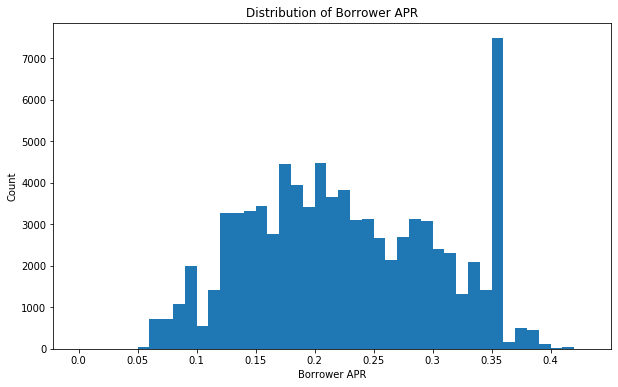

In [3]:
bins = np.arange(0, df_sub.BorrowerAPR.max()+0.01, 0.01)
plt.figure(figsize=[10, 6])
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins)
ticks = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
plt.xticks(ticks, ticks)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

## Borrower APR vs. Loan Amount

> From the plot, it can be seen Borrower APR and Loan Amount have a negative correlation. Meaning, the higher the Loan Amount, the lower the APR will be.

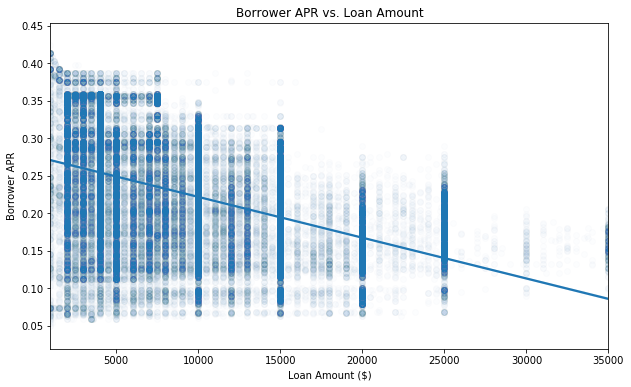

In [4]:
plt.figure(figsize = [10, 6])
sb.regplot(data = df_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

## Borrower APR vs. Prosper Rating (Alpha)

> The plot shows that the correlation between borrower APR and Prosper Rating (ALpha) is negative. This means that the better an individual's Prosper Rating, the less their APR will be.

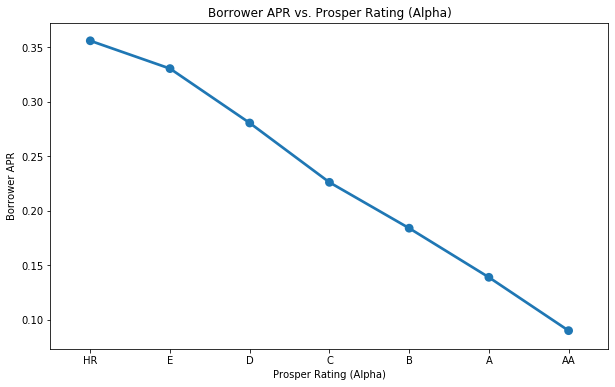

In [5]:
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.pointplot(data=df_sub, x='ProsperRating (Alpha)', y='BorrowerAPR')
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating (Alpha)');

## Borrower APR vs. Prosper Score

> The relationship between Borrower APR and Prosper Score is negative, although not as strongly correlated as APR vs Prosper Rating. This means that the higher the Prosper Score, the lower the APR.

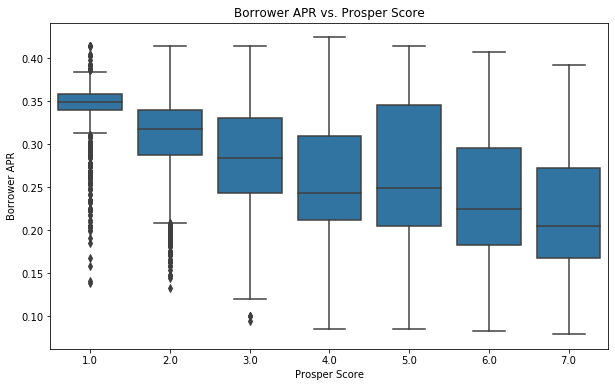

In [6]:
plt.figure(figsize=[10,6])
sb.boxplot(data=df_sub, x='ProsperScore', y='BorrowerAPR', color = base_color)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Score');

## Borrower APR vs. IsBorrowerHomeOwner

> Although, the difference is not so much, it can be seen that individuals that are not home owners generally have a higher APR than those that are.

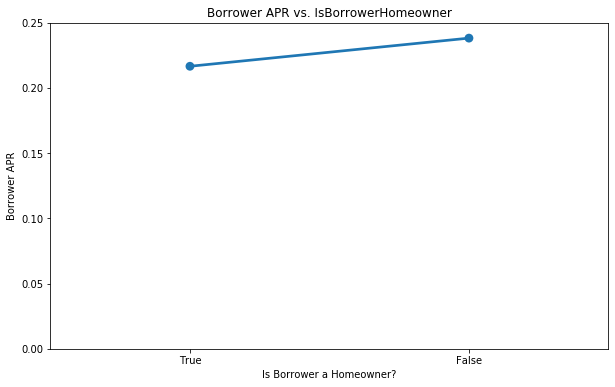

In [12]:
plt.figure(figsize=[10,6])
sb.pointplot(data=df_sub, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color)
plt.ylim(0, 0.25)
plt.xlabel('Is Borrower a Homeowner?')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. IsBorrowerHomeowner');

## Prosper Rating Effect on Relationship between APR and Loan Amount

> Interestingly, the relationship between borrower APR and loan amount turns from slightly negative to slightly positive as the Prosper Rating (Alpha) gets better (increases). This may be, so as to ensure the APR does not get excessively small, thereby extending the borrower Term. 

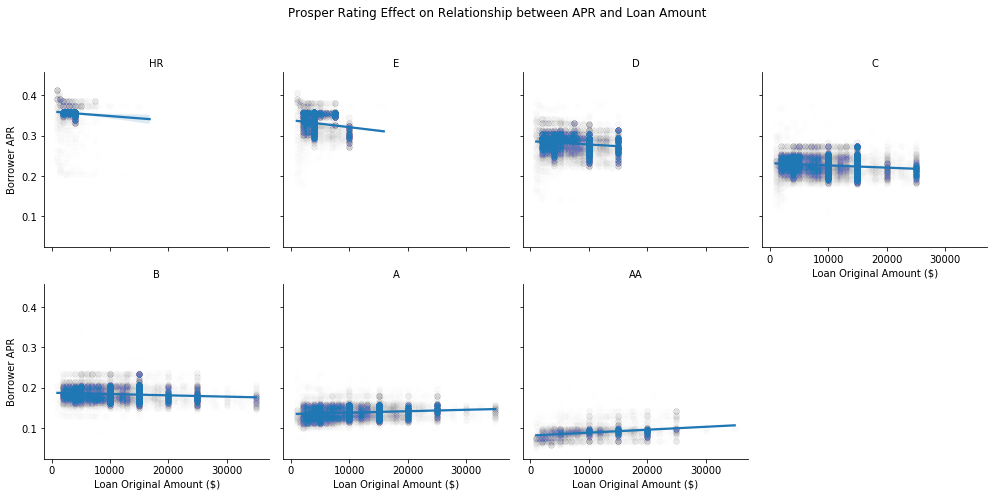

In [20]:
g = sb.FacetGrid(data=df_sub, col='ProsperRating (Alpha)', height=3.5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.005});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Original Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!